<a href="https://colab.research.google.com/github/daeyeonglim/james/blob/master/Rolling_Process(20220811).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 코랩 서버 스팩 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4025728754902660541
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13041878709388182312
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [ ]:
# 개발플랫폼, 파이썬 버전 확인
import platform
print("Platform Version: ", platform.platform())
text=!python --version
print("  Python Version: ",text)

Platform Version:  Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
  Python Version:  ['Python 3.7.13']


In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
import os
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
# Pandas를 이용하여 원본 데이터(엑셀) 파일 로드
import pandas as pd
df = pd.read_excel("/content/MyDrive/MyDrive/test/data/data_dx.xlsx")

In [ ]:
# 로드한 엑셀 파일을 .csv파일로 저장
df.to_csv('/content/MyDrive/MyDrive/test/data/data_dx.csv', sep=',', na_rep='NaN', index = False)

In [ ]:
# Pandas를 이용하여 저장된 .csv 파일 불러오기
df2 = pd.read_csv("/content/MyDrive/MyDrive/test/data/data_dx.csv")
# 불러온 .csv 데이터 요약하여 살펴보기
df2.head()

CoilNO        제품종류  제품Size               압연시작일시               압연완료일시  \
0  Q540024003  Product_17     7.0  2016-01-01 05:56:00  2016-01-01 06:00:00   
1  Q540027003  Product_17     7.0  2016-01-01 05:57:00  2016-01-01 06:02:00   
2  Q540030003  Product_17     7.0  2016-01-01 05:59:00  2016-01-01 06:03:00   
3  Q540033003  Product_17     7.0  2016-01-01 06:00:00  2016-01-01 06:04:00   
4  Q540036003  Product_17     7.0  2016-01-01 06:01:00  2016-01-01 06:05:00   

   Descaler.No1_Pressure  Descaler.No2_Pressure  조압연입측소재온도  조압연입측소재온도.1  \
0                    243                    142       1065            0   
1                    253                    143       1062            0   
2                    225                    141       1061            0   
3                    235                    143       1064            0   
4                    251                    142       1061            0   

   중간사상압연_No2_출측소재온도  ...  Middle.Cooling Zone#4(4WB)유량  \
0               1030  ...                         410.9   
1               1024  ...                         401.8   
2               1029  ...                         395.2   
3               1024  ...                         400.6   
4               1025  ...                         348.9   

   Middle.Cooling Zone#4(4WB)압력  Last.Cooling Zone#1(1WB)유량  \
0                           1.0                       584.2   
1                           1.0                       581.2   
2                           0.9                       581.7   
3                           1.0                       580.4   
4                           0.7                       580.6   

   Last.Cooling Zone#1(1WB)압력  Last.Cooling Zone#2(2WB)유량  \
0                         1.0                       593.2   
1                         1.0                       584.7   
2                         1.0                       582.2   
3                         1.0                       583.4   
4                         1.0                       581.8   

   Last.Cooling Zone#2(2WB)압력  Rolling Time  Idle Time  압연 Pitch  선재사상압연모터전류  
0                         1.6            67          7        74  704.610300  
1                         1.6            67          7        74  709.257700  
2                         1.6            67          8        75  725.786700  
3                         1.6            67         11        78  717.851033  
4                         1.6            67          8        75  699.787467  

[5 rows x 42 columns]

In [ ]:
# 데이터 프레임 크기
print(df2.shape)

(100469, 42)


In [ ]:
# 데이터 프레임 기본정보
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100469 entries, 0 to 100468
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CoilNO                        100469 non-null  object 
 1   제품종류                          100469 non-null  object 
 2   제품Size                        100469 non-null  float64
 3   압연시작일시                        100469 non-null  object 
 4   압연완료일시                        100469 non-null  object 
 5   Descaler.No1_Pressure         100469 non-null  int64  
 6   Descaler.No2_Pressure         100469 non-null  int64  
 7   조압연입측소재온도                     100469 non-null  int64  
 8   조압연입측소재온도.1                   100469 non-null  int64  
 9   중간사상압연_No2_출측소재온도             100469 non-null  int64  
 10  선재사상압연입측소재온도                  100469 non-null  int64  
 11  선재사상압연출측소재온도                  100469 non-null  int64  
 12  최종압연 입측소재온도                   100469 non-nul

In [ ]:
# 데이터 프레임 통계정보 확인
print(df2.describe())

              제품Size  Descaler.No1_Pressure  Descaler.No2_Pressure  \
count  100469.000000          100469.000000          100469.000000   
mean       11.072226             246.917049              62.849585   
std         4.256280              17.589708              79.428583   
min         5.500000               0.000000               0.000000   
25%         6.500000             243.000000               0.000000   
50%        11.000000             250.000000               0.000000   
75%        14.000000             256.000000             147.000000   
max        21.000000             279.000000             251.000000   

           조압연입측소재온도    조압연입측소재온도.1  중간사상압연_No2_출측소재온도   선재사상압연입측소재온도  \
count  100469.000000  100469.000000      100469.000000  100469.000000   
mean     1011.367397     611.034379        1007.362868     950.633200   
std        51.182562     490.536307          70.449096      37.664629   
min         0.000000       0.000000           0.000000       0.000000   
25% 

In [ ]:
# 각 인덱스별 0을 포함 개수 카운팅하기
y_data_values = []
for i in range(0,len(df2.columns)):
    find_0=(df2.index[df2.iloc[:, i] == 0].tolist())
    print(df2.columns[i], ':', str(len(find_0)),)
    y_data_values.append(len(find_0))

CoilNO : 0
제품종류 : 0
제품Size : 0
압연시작일시 : 0
압연완료일시 : 0
Descaler.No1_Pressure : 69
Descaler.No2_Pressure : 60945
조압연입측소재온도 : 12
조압연입측소재온도.1 : 39254
중간사상압연_No2_출측소재온도 : 316
선재사상압연입측소재온도 : 21
선재사상압연출측소재온도 : 3816
최종압연 입측소재온도 : 107
선재 Wire Rod 인출장치 출측소재온도 : 99
조압연입측속도 : 6
조압연출측속도 : 6
중간압연1출측속도 : 333
중간압연2출측속도 : 320
중간사상압연_No2_출측속도 : 316
선재사상압연출측속도 : 13
최종압연 출측속도 : 31
선재 Wire Rod 인출장치 진입속도 : 29
First.Cooling Zone#1(1WB)유량 : 663
First.Cooling Zone#1(1WB)압력 : 34947
First.Cooling Zone#2(2WB)유량 : 331
First.Cooling Zone#2(2WB)압력 : 35261
Middle.Cooling Zone#1(1WB)유량 : 93
Middle.Cooling Zone#1(1WB)압력 : 8652
Middle.Cooling Zone#2(2WB)유량 : 238
Middle.Cooling Zone#2(2WB)압력 : 3623
Middle.Cooling Zone#3(3WB)유량 : 498
Middle.Cooling Zone#3(3WB)압력 : 2973
Middle.Cooling Zone#4(4WB)유량 : 132
Middle.Cooling Zone#4(4WB)압력 : 2567
Last.Cooling Zone#1(1WB)유량 : 59
Last.Cooling Zone#1(1WB)압력 : 1052
Last.Cooling Zone#2(2WB)유량 : 54
Last.Cooling Zone#2(2WB)압력 : 1005
Rolling Time : 10
Idle Time : 9
압연 Pitch : 9
선재사상압연모터전류

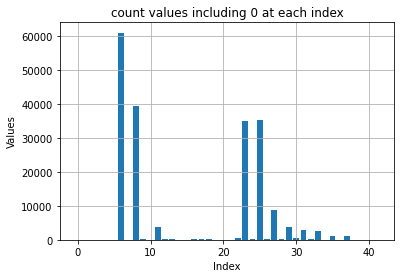

In [ ]:
# 데이터 인덱스 값을 이용하여 그래프로 표현
import numpy as np
import matplotlib.pyplot as plt
plt.bar(range(len(df2.columns)), y_data_values)
plt.xlabel('Index'), plt.ylabel('Values')
plt.title('count values including 0 at each index')
plt.grid(True)
plt.show()

In [ ]:
# 특정 인덱스 열 삭제
df3 = df2.drop(columns = ['CoilNO', '제품종류', '압연시작일시', '압연완료일시', 'Descaler.No2_Pressure', '조압연입측소재온도.1', 'First.Cooling Zone#1(1WB)압력',  'First.Cooling Zone#2(2WB)압력', 'Middle.Cooling Zone#1(1WB)압력', 'Rolling Time', 'Idle Time', '압연 Pitch'])
print('데이터 프레임 크기:', df3.shape)

데이터 프레임 크기: (100469, 30)


In [ ]:
# 특정 인덱스 열 삭제 후 변경된 전체 인덱스 확인
df3.columns

Index(['제품Size', 'Descaler.No1_Pressure', '조압연입측소재온도', '중간사상압연_No2_출측소재온도',
       '선재사상압연입측소재온도', '선재사상압연출측소재온도', '최종압연 입측소재온도',
       '선재 Wire Rod 인출장치 출측소재온도', '조압연입측속도', '조압연출측속도', '중간압연1출측속도',
       '중간압연2출측속도', '중간사상압연_No2_출측속도', '선재사상압연출측속도', '최종압연 출측속도',
       '선재 Wire Rod 인출장치 진입속도', 'First.Cooling Zone#1(1WB)유량',
       'First.Cooling Zone#2(2WB)유량', 'Middle.Cooling Zone#1(1WB)유량',
       'Middle.Cooling Zone#2(2WB)유량', 'Middle.Cooling Zone#2(2WB)압력',
       'Middle.Cooling Zone#3(3WB)유량', 'Middle.Cooling Zone#3(3WB)압력',
       'Middle.Cooling Zone#4(4WB)유량', 'Middle.Cooling Zone#4(4WB)압력',
       'Last.Cooling Zone#1(1WB)유량', 'Last.Cooling Zone#1(1WB)압력',
       'Last.Cooling Zone#2(2WB)유량', 'Last.Cooling Zone#2(2WB)압력',
       '선재사상압연모터전류'],
      dtype='object')

In [ ]:
# 데이터 결측값 대체를 위해 df4에 df3 데이터 저장
df4 = df3.copy()

# 1번 인덱스 ['Descaler.No1_Pressure'] 0 개수 카운팅하기
find_0=(df3.index[df3.iloc[:, 1] == 0].tolist())
print('(Before) ',df3.columns[1], ':', str(len(find_0)),)

# 1번 인덱스의 평균값 계산
mean_val = (df4.iloc[:, 1].mean())
print('mean of Descaler.No1_Pressure: ', round(mean_val, 2))

# 1번 인덱스에서 0인 곳을 평균값으로 대체
df4.iloc[:, 1] = np.where(df4.iloc[:, 1] == 0, mean_val, df4.iloc[:, 1])

# 1번 인덱스 0 개수 카운팅하기
find_0=(df4.index[df4.iloc[:, 1] == 0].tolist())
print('(After) ',df4.columns[1], ':', str(len(find_0)))

(Before)  Descaler.No1_Pressure : 69
mean of Descaler.No1_Pressure:  246.92
(After)  Descaler.No1_Pressure : 0


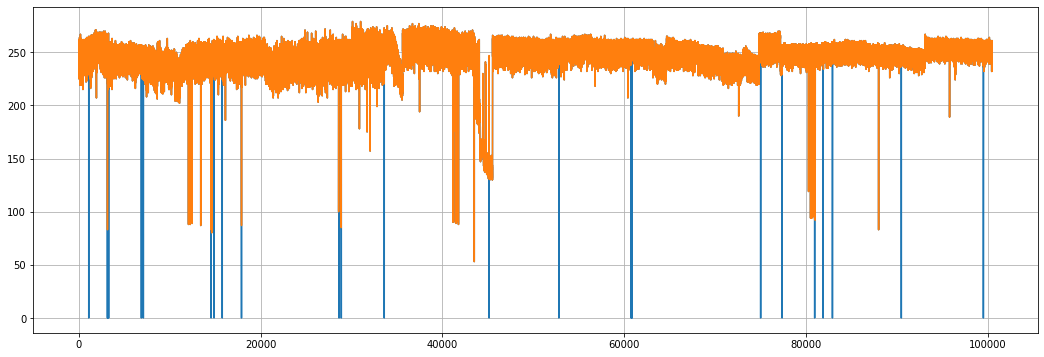

In [ ]:
# 1번 인덱스 plot 그래프(‘0’ 결측값 대체)
plt.figure(figsize=(18,6)), plt.grid()
plt.plot(df3.iloc[:, 1], label='Current')
plt.plot(df4.iloc[:, 1], label='Current')
plt.show()

In [ ]:
# 전체 인덱스에 대해, 각 인덱스에서 0인 곳을 평균값으로 대체
for i in range(0,len(df4.columns)):
    mean_val = (df4.iloc[:, i].mean())
    df4.iloc[:, i] = np.where(df4.iloc[:, i] == 0, mean_val, df4.iloc[:, i])
    
# 앞의 평균값 대체로 ‘0’ 값을 가지고 있는 인덱스가 있는지 확인
y_data_values = []
for i in range(0,len(df4.columns)):
    find_0=(df4.index[df4.iloc[:, i] == 0].tolist())
    print(df4.columns[i], ':', str(len(find_0)),)
    y_data_values.append(len(find_0))

제품Size : 0
Descaler.No1_Pressure : 0
조압연입측소재온도 : 0
중간사상압연_No2_출측소재온도 : 0
선재사상압연입측소재온도 : 0
선재사상압연출측소재온도 : 0
최종압연 입측소재온도 : 0
선재 Wire Rod 인출장치 출측소재온도 : 0
조압연입측속도 : 0
조압연출측속도 : 0
중간압연1출측속도 : 0
중간압연2출측속도 : 0
중간사상압연_No2_출측속도 : 0
선재사상압연출측속도 : 0
최종압연 출측속도 : 0
선재 Wire Rod 인출장치 진입속도 : 0
First.Cooling Zone#1(1WB)유량 : 0
First.Cooling Zone#2(2WB)유량 : 0
Middle.Cooling Zone#1(1WB)유량 : 0
Middle.Cooling Zone#2(2WB)유량 : 0
Middle.Cooling Zone#2(2WB)압력 : 0
Middle.Cooling Zone#3(3WB)유량 : 0
Middle.Cooling Zone#3(3WB)압력 : 0
Middle.Cooling Zone#4(4WB)유량 : 0
Middle.Cooling Zone#4(4WB)압력 : 0
Last.Cooling Zone#1(1WB)유량 : 0
Last.Cooling Zone#1(1WB)압력 : 0
Last.Cooling Zone#2(2WB)유량 : 0
Last.Cooling Zone#2(2WB)압력 : 0
선재사상압연모터전류 : 0


In [ ]:
# 3278번째 0이 평균값으로 대체되었음을 확인
tmp=pd.concat([df2.loc[3274:3282, 'Descaler.No1_Pressure'], 
               round(df4.loc[3274:3282, 'Descaler.No1_Pressure'])], axis = 1)
print(tmp)

      Descaler.No1_Pressure  Descaler.No1_Pressure
3274                    248                  248.0
3275                    250                  250.0
3276                    246                  246.0
3277                    250                  250.0
3278                      0                  247.0
3279                    243                  243.0
3280                    247                  247.0
3281                    255                  255.0
3282                    247                  247.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# 인덱스 번호 및 인덱스 이름 출력
new_index=[]
for ct in range(len(df4.columns)):
    print(str(df4.index[ct]), str(df3.columns[ct]))
    index_name='D'+str(ct)
    new_index.append(index_name)
print(new_index)
old_index = df3.columns; df4.columns = new_index

0 제품Size
1 Descaler.No1_Pressure
2 조압연입측소재온도
3 중간사상압연_No2_출측소재온도
4 선재사상압연입측소재온도
5 선재사상압연출측소재온도
6 최종압연 입측소재온도
7 선재 Wire Rod 인출장치 출측소재온도
8 조압연입측속도
9 조압연출측속도
10 중간압연1출측속도
11 중간압연2출측속도
12 중간사상압연_No2_출측속도
13 선재사상압연출측속도
14 최종압연 출측속도
15 선재 Wire Rod 인출장치 진입속도
16 First.Cooling Zone#1(1WB)유량
17 First.Cooling Zone#2(2WB)유량
18 Middle.Cooling Zone#1(1WB)유량
19 Middle.Cooling Zone#2(2WB)유량
20 Middle.Cooling Zone#2(2WB)압력
21 Middle.Cooling Zone#3(3WB)유량
22 Middle.Cooling Zone#3(3WB)압력
23 Middle.Cooling Zone#4(4WB)유량
24 Middle.Cooling Zone#4(4WB)압력
25 Last.Cooling Zone#1(1WB)유량
26 Last.Cooling Zone#1(1WB)압력
27 Last.Cooling Zone#2(2WB)유량
28 Last.Cooling Zone#2(2WB)압력
29 선재사상압연모터전류
['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29']


In [ ]:
# 상위 12 importance를 갖는 인덱스 출력
for index_rank_num in [13, 15, 8, 2, 5, 3, 9, 11, 10, 4, 12, 18]:
    print(str(new_index[index_rank_num]), str(old_index[index_rank_num]))

D13 선재사상압연출측속도
D15 선재 Wire Rod 인출장치 진입속도
D8 조압연입측속도
D2 조압연입측소재온도
D5 선재사상압연출측소재온도
D3 중간사상압연_No2_출측소재온도
D9 조압연출측속도
D11 중간압연2출측속도
D10 중간압연1출측속도
D4 선재사상압연입측소재온도
D12 중간사상압연_No2_출측속도
D18 Middle.Cooling Zone#1(1WB)유량


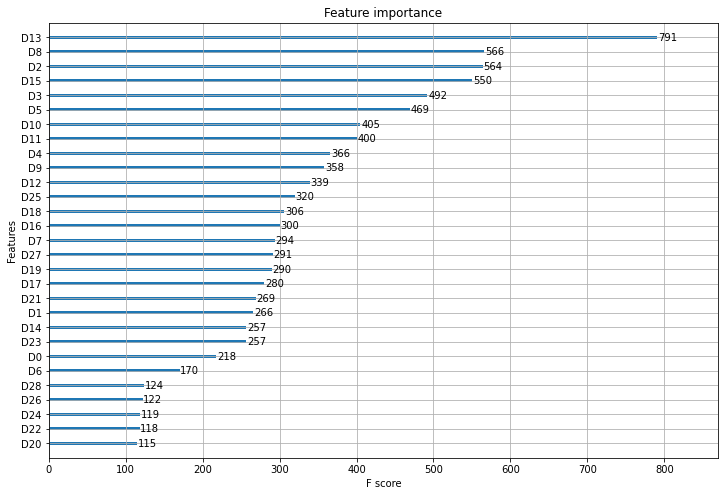

In [ ]:

# 데이터 셋으로 부터 train, test 분리
Y_data = df4['D29']
X_data = df4.drop(columns = ['D29'])

# XGBoost 기법 적용
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data ,test_size=0.1)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train,y_train)

# xgb를 이용한 특징 중요도 출력
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(xgb_model, ax=ax)

In [ ]:
# xgb 모델 점수 평가
predictions = xgb_model.predict(X_test)
r_sq = xgb_model.score(X_train, y_train)
print('xgb model score:', r_sq)
print('xgb explained_variance_score:', explained_variance_score(predictions,y_test))

xgb model score: 0.9928587323494223
xgb explained_variance_score: 0.9900365372761997


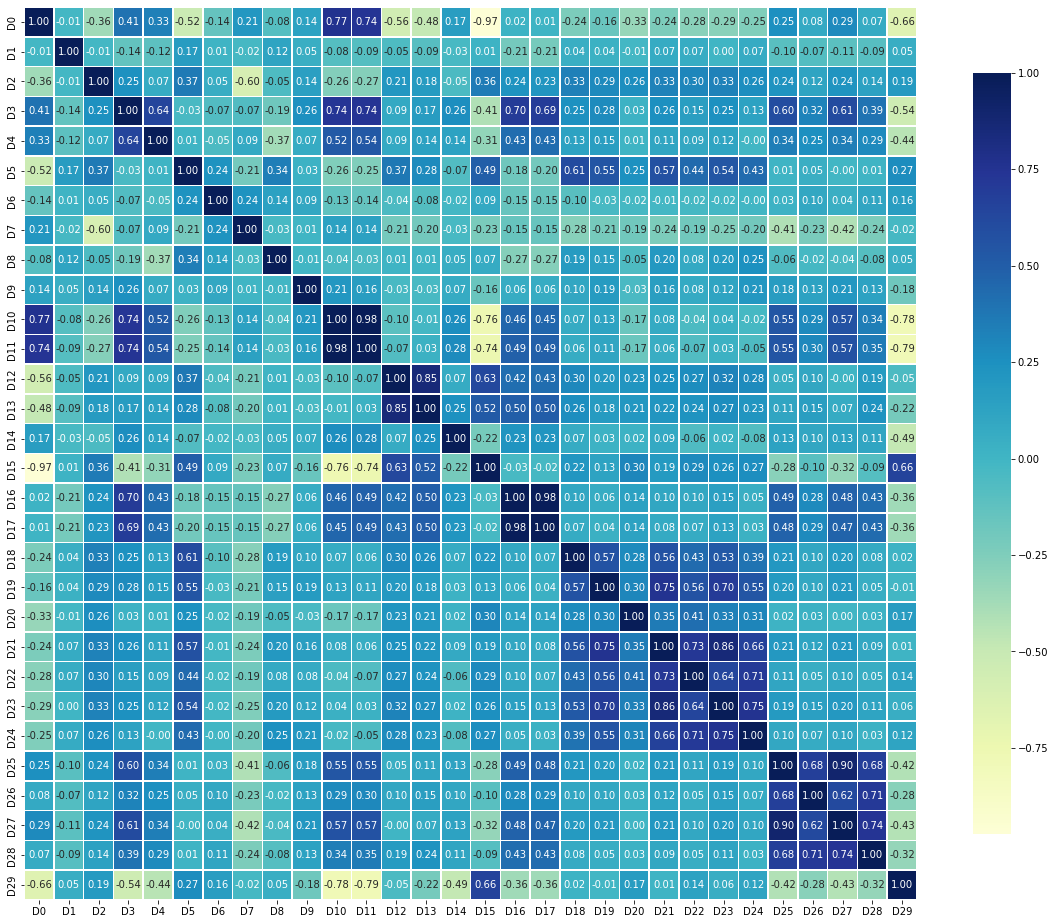

In [ ]:
# 학습데이터 인덱스들의 상관 분석
import seaborn as sns
correlations = df4.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
            )
plt.show()

In [ ]:
# 상위 12 importance를 갖는 인덱스 출력
for index_rank_num in [13, 15, 8, 2, 5, 3, 9, 11, 10, 4, 12, 18]:
    print(str(new_index[index_rank_num]), str(old_index[index_rank_num]))

D13 선재사상압연출측속도
D15 선재 Wire Rod 인출장치 진입속도
D8 조압연입측속도
D2 조압연입측소재온도
D5 선재사상압연출측소재온도
D3 중간사상압연_No2_출측소재온도
D9 조압연출측속도
D11 중간압연2출측속도
D10 중간압연1출측속도
D4 선재사상압연입측소재온도
D12 중간사상압연_No2_출측속도
D18 Middle.Cooling Zone#1(1WB)유량


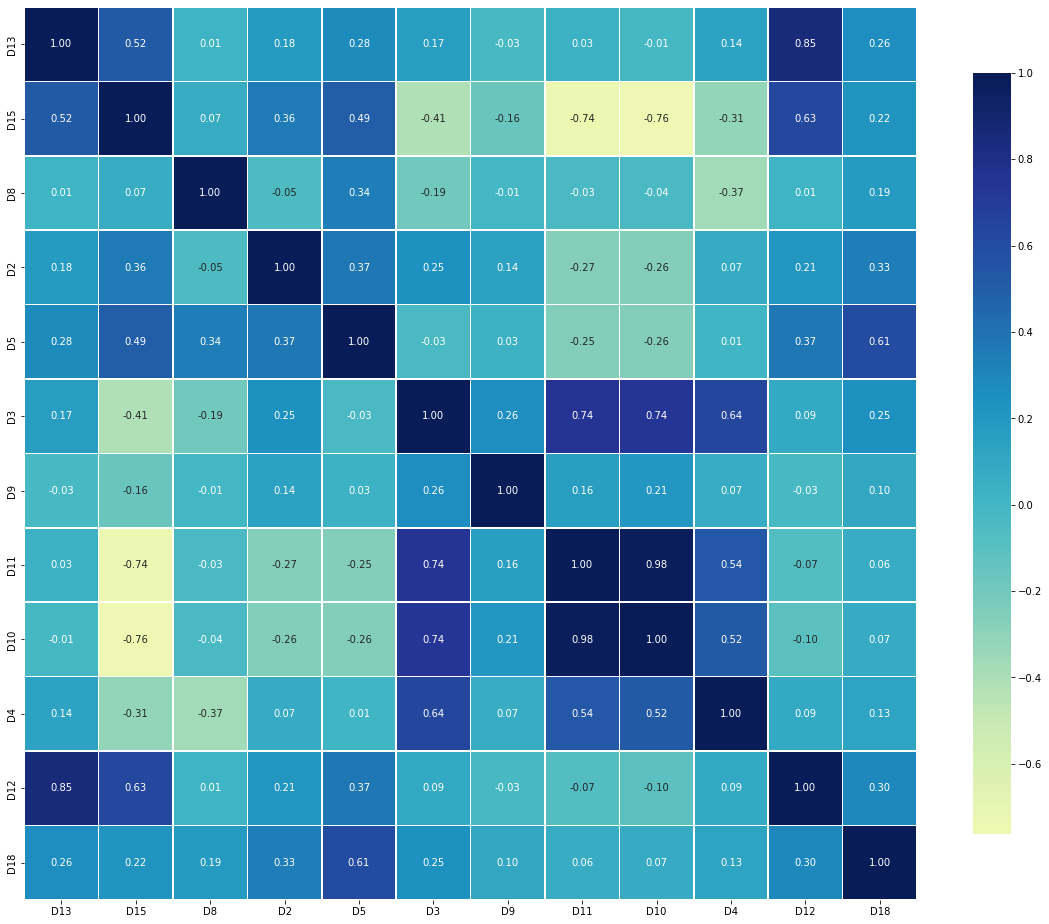

In [ ]:
# 중요도가 높은 인덱스들의 상관 분석
X_data_selected = X_data.iloc[:,[13, 15, 8, 2, 5, 3, 9, 11, 10, 4, 12, 18]]

correlations = X_data_selected.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
            )
plt.show()

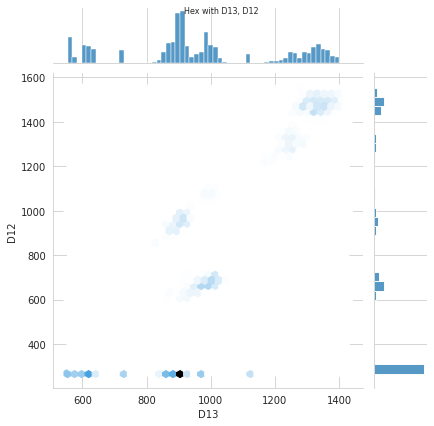

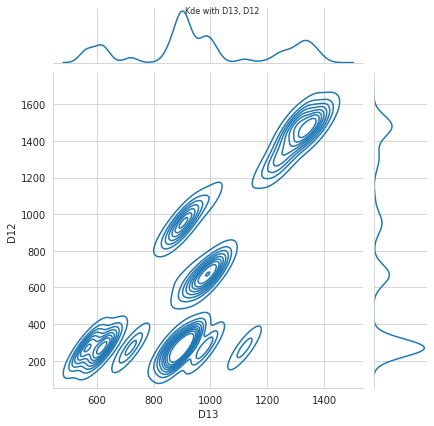

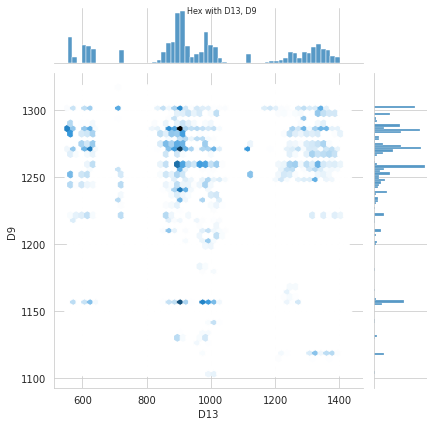

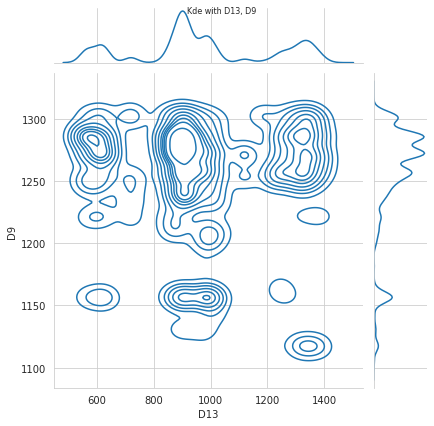

In [ ]:
# 스타일 설정
sns.set_style('whitegrid')

# 조인트 그래프 - 육각 산점도
j1 = sns.jointplot(x='D13', y='D12', kind='hex', data=X_data_selected)
j1.fig.suptitle('Hex with D13, D12', size=8)
plt.show()

# 조인트 그래프 - 커널 밀집도
j2 = sns.jointplot(x='D13', y='D12', kind='kde', data=X_data_selected)
j2.fig.suptitle('Kde with D13, D12', size=8)
plt.show()

# 조인트 그래프 - 육각 산점도
j3 = sns.jointplot(x='D13', y='D9', kind='hex', data=X_data_selected)
j3.fig.suptitle('Hex with D13, D9', size=8)
plt.show()

# 조인트 그래프 - 커널 밀집도
j4 = sns.jointplot(x='D13', y='D9', kind='kde', data=X_data_selected)
j4.fig.suptitle('Kde with D13, D9', size=8)
plt.show()

In [ ]:
# AI 학습을 위한 학습, 테스트 데이터 변수 정의 및 저장
X_AI = X_data_selected
Y_AI = Y_data
print('X_AI Data Shape:', X_AI.shape)
print('Y_AI Data Shape:', Y_AI.shape)
X_AI.to_csv('/content/MyDrive/MyDrive/test/data/X_AI.csv', sep=',', na_rep='NaN', index = False)
Y_AI.to_csv('/content/MyDrive/MyDrive/test/data/Y_AI.csv', sep=',', na_rep='NaN', index = False)

# 학습, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_AI, Y_AI, test_size=0.3, random_state=10)
print('x_train data 개수: ', len(x_train))
print('x_test data 개수: ', len(x_test))
print('y_train data 개수: ', len(y_train))
print('y_test data 개수: ', len(y_test))

X_AI Data Shape: (100469, 12)
Y_AI Data Shape: (100469,)
x_train data 개수:  70328
x_test data 개수:  30141
y_train data 개수:  70328
y_test data 개수:  30141


R2 score:  0.8844
기울기 a:  [-0.35531745  0.24889377 -0.01338931 -0.26194906 -0.06509736  0.42767625
 -0.11647856 -0.02135929  0.05945048 -0.1399801  -0.09166107 -0.00049881]
y절편 b 737.5738973261491


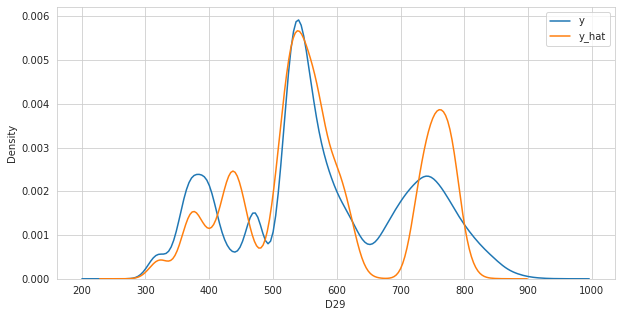

In [ ]:
# 선형 회귀분석
from sklearn.linear_model import LinearRegression

# 선형 회귀분석 모델 객체 생성
lr = LinearRegression()

# train data를 가지고 모델 학습
lr.fit(x_train, y_train)
r_square = lr.score(x_test, y_test)
print('R2 score: ', round(r_square, 4))

# 회귀식알고리즘 기울기
print('기울기 a: ', lr.coef_)
# 회귀식알고리즘 y절편
print('y절편 b', lr.intercept_)

# 모델에 전체 X_AI 데이터를 입력하여 예측한 값 y_hat을 실제 값 Y_AI와 비교
y_hat = lr.predict(X_AI)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(Y_AI, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [ ]:
# Decision Tree 모델
from sklearn import tree
from sklearn.tree import export_text, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 모델생성
tree_model = tree.DecisionTreeRegressor(random_state=1, min_samples_leaf=35, max_depth=10)

# 모델학습
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test)

# 학습, 테스트 모델 점수
print("(Train set) Tree Score", tree_model.score(x_train, y_train, sample_weight=None)) 
mse = mean_squared_error(y_test, y_hat)
print("(Test set) Tree Score", tree_model.score(x_test, y_test, sample_weight=None)) 

# 모델 성증(MSE, MAE, RMSE, MAPE)
mse=mean_squared_error(y_test,y_hat)
print('MSE: %.3f' % mean_squared_error(y_test,y_hat))
print('MAE: %.3f' % mean_absolute_error(y_test,y_hat))
print('RMSE: %.3f' % np.sqrt(mse))
 
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_hat) / y_test)) * 100 
    
print('MAPE: %.3f' % MAPE(y_test,y_hat))

# 결정 트리 모델 구조 텍스트 시각화
print(export_text(tree_model))

# 결정 트리 모델 구조 이미지 시각화
plt.rcParams["figure.figsize"] = (800, 60)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

plot_tree(tree_model, impurity=True, filled=True, rounded=True)

(Train set) Tree Score 0.9839307121177897
(Test set) Tree Score 0.9825347300132042
MSE: 324.615
MAE: 11.088
RMSE: 18.017
MAPE: 1.806
|--- feature_1 <= 2090.70
|   |--- feature_0 <= 976.87
|   |   |--- feature_1 <= 597.30
|   |   |   |--- feature_0 <= 716.35
|   |   |   |   |--- feature_2 <= 1361.00
|   |   |   |   |   |--- feature_8 <= 1534.00
|   |   |   |   |   |   |--- feature_3 <= 867.50
|   |   |   |   |   |   |   |--- value: [470.77]
|   |   |   |   |   |   |--- feature_3 >  867.50
|   |   |   |   |   |   |   |--- feature_11 <= 19.45
|   |   |   |   |   |   |   |   |--- feature_4 <= 888.50
|   |   |   |   |   |   |   |   |   |--- value: [472.97]
|   |   |   |   |   |   |   |   |--- feature_4 >  888.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 1469.15
|   |   |   |   |   |   |   |   |   |   |--- value: [471.40]
|   |   |   |   |   |   |   |   |   |--- feature_8 >  1469.15
|   |   |   |   |   |   |   |   |   |   |--- value: [472.26]
|   |   |   |   |   |   |   |--- feat

[Text(0.5494525547445256, 0.9545454545454546, 'X[1] <= 2090.7\nsquared_error = 18441.801\nsamples = 70328\nvalue = 578.761'),
 Text(0.30231523722627734, 0.8636363636363636, 'X[0] <= 976.867\nsquared_error = 6831.906\nsamples = 43432\nvalue = 492.619'),
 Text(0.11717609489051095, 0.7727272727272727, 'X[1] <= 597.3\nsquared_error = 1420.506\nsamples = 29683\nvalue = 542.633'),
 Text(0.04051094890510949, 0.6818181818181818, 'X[0] <= 716.35\nsquared_error = 5.238\nsamples = 3380\nvalue = 471.397'),
 Text(0.017335766423357664, 0.5909090909090909, 'X[2] <= 1361.0\nsquared_error = 4.237\nsamples = 1544\nvalue = 472.484'),
 Text(0.008759124087591242, 0.5, 'X[8] <= 1534.0\nsquared_error = 2.684\nsamples = 528\nvalue = 471.714'),
 Text(0.00583941605839416, 0.4090909090909091, 'X[3] <= 867.5\nsquared_error = 2.691\nsamples = 433\nvalue = 471.926'),
 Text(0.004379562043795621, 0.3181818181818182, 'squared_error = 1.645\nsamples = 35\nvalue = 470.766'),
 Text(0.0072992700729927005, 0.31818181818181

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# 데이터 전처리
transformer = MinMaxScaler()
transformer.fit(X_AI)
x_data_scaled = transformer.transform(X_AI)
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, Y_AI, test_size=0.3, random_state=777)

# 다층 신경망 모델 생성(MLPRegressor) #2개 은닉층 각 32개의 유닛할당
model = MLPRegressor(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.1, max_iter=1000, batch_size=32, shuffle=True, random_state=777)

# 모델 학습
model.fit(x_train, y_train)

# 모델 정확도 평가(R2 score) 0.9637
print('R2-Score: ', round(model.score(x_test, y_test), 4))


R2-Score:  0.9609
